In [6]:
# Helper packages
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
import math
from scipy import stats 


# Modeling preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

# Modeling and resampling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error 
from math import sqrt

ModuleNotFoundError: No module named 'numpy'

In [5]:
parkinsons_df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data')

NameError: name 'pd' is not defined

In [ ]:
parkinsons_df

Description of the variables

* **Subject** : Integer that uniquely identifies each subject
* **Age** : Subject age
* **sex** : Subject gender '0' - male, '1' - female
* **test_time** : Time since recruitment into the trial. The integer part is the number of days since recruitment.
* **motor_UPDRS** : Clinician's motor UPDRS score, linearly interpolated
* **total_UPDRS** :Clinician's total UPDRS score, linearly interpolated
* **Jitter(%),Jitter(Abs),Jitter** :RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency
* **Shimmer, Shimmer (dB), Shimmer. APQ3, Shimmer. APQ5, Shimmer. APQ11, Shimmer. DDA** :Several measures of variation in amplitude (Amplitude parameters) NHR, HNR: Two measures of ratio of noise to tonal components in the voice
* **RPDE** : A nonlinear dynamical complexity measure
* **DFA** :Signal fractal scaling exponent
* **PPE** : A nonlinear measure of fundamental frequency variation

## 1. Sampeling and Feature Engineering (Portfolio Builder Exercise #1)

Identify one of the open source datasets you found during module 1’s exercise. Create a new Github repository that will focus on analyzing this dataset. Write up an initial report that answers the following:

### 1.1. Random Sampling

In [128]:
train, test = train_test_split(parkinsons_df, test_size=0.3, random_state=123)

In [150]:
x_train = train.drop('total_UPDRS', axis=1)
y_train = train['total_UPDRS']

x_test = test.drop('total_UPDRS', axis = 1)
y_test = test['total_UPDRS']

In [165]:
x_train_o=x_train.copy()
x_test_o=x_test.copy()
y_train_o=y_train.copy()
y_test_o=y_test.copy()

### 1.2. Target Engineering

The target in the data set is *total_UPDRS*

1. Assess the distribution of the target / response variable.
- Is the response skewed?
- Does applying a transformation normalize the distribution?

(array([111.,  13.,  39.,  44.,  42., 106., 114., 150.,  92., 184., 145.,
        137., 215., 227., 343., 207., 133., 168., 256., 145., 157.,  80.,
        105.,  89., 149.,  94., 104., 124.,  85.,  46.,  40.,  15.,  11.,
         12.,  30., 100.]),
 array([ 7.        ,  8.33311111,  9.66622222, 10.99933333, 12.33244444,
        13.66555556, 14.99866667, 16.33177778, 17.66488889, 18.998     ,
        20.33111111, 21.66422222, 22.99733333, 24.33044444, 25.66355556,
        26.99666667, 28.32977778, 29.66288889, 30.996     , 32.32911111,
        33.66222222, 34.99533333, 36.32844444, 37.66155556, 38.99466667,
        40.32777778, 41.66088889, 42.994     , 44.32711111, 45.66022222,
        46.99333333, 48.32644444, 49.65955556, 50.99266667, 52.32577778,
        53.65888889, 54.992     ]),
 <BarContainer object of 36 artists>)

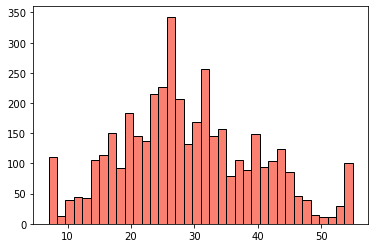

In [205]:
plt.hist(y_train, color = 'salmon', edgecolor = 'black', bins = int(180/5))

The target variable as shown in the plot above is not skewed and it is normally distrebuted. So, There is no need to apply transformation usin the log, box cox or yeo johnson.

### 1.2. Missingniss Handeling

2. Assess the dataset for missingness. How many observations have missing values? 
- Plot the missing values. 
- Does there appear to be any patterns to the missing values? 
- How do you think the different imputation approaches would impact modeling results?

In [131]:
print('The missing values in Parkinsons Telemonetoring data are ',parkinsons_df.isnull().sum().sum())

The missing values in Parkinsons Telemonetoring data are  0


As above the dataset has no missing values. So, we don't have to apply any of the missing values handleng methods such as: Imputation.

### 1.3. Feature filtering

3. Assess the variance across the features. 
- Do any features have zero variance? 
- Do any features have near-zero variance?

In [152]:
thresholder = VarianceThreshold()
thresholder.fit_transform(x_train)

array([[21.     , 73.     ,  0.     , ...,  0.45239,  0.69349,  0.23968],
       [ 8.     , 73.     ,  1.     , ...,  0.52245,  0.67575,  0.15161],
       [15.     , 65.     ,  0.     , ...,  0.44169,  0.67883,  0.14879],
       ...,
       [ 9.     , 68.     ,  0.     , ...,  0.58004,  0.70404,  0.29972],
       [25.     , 76.     ,  0.     , ...,  0.66059,  0.56084,  0.22049],
       [26.     , 49.     ,  0.     , ...,  0.56374,  0.70793,  0.2489 ]])

In [153]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[thresholder.get_support()]]

print(len(constant_columns))

0


With help of *VarianceThreshold*, the dataset doesn't contain zero and near-zero features

### 1.4. Numeric feature engineering

4. Assess the numeric features. 
- Do some features have significant skewness? 
- Do features have a wide range of values that would benefit from standardization?

All the features are numeric except *sex* feature.

In [154]:
numeric_f=[cols for cols in x_train.columns if cols!='sex']

In [135]:
len(color)

20

No handles with labels found to put in legend.


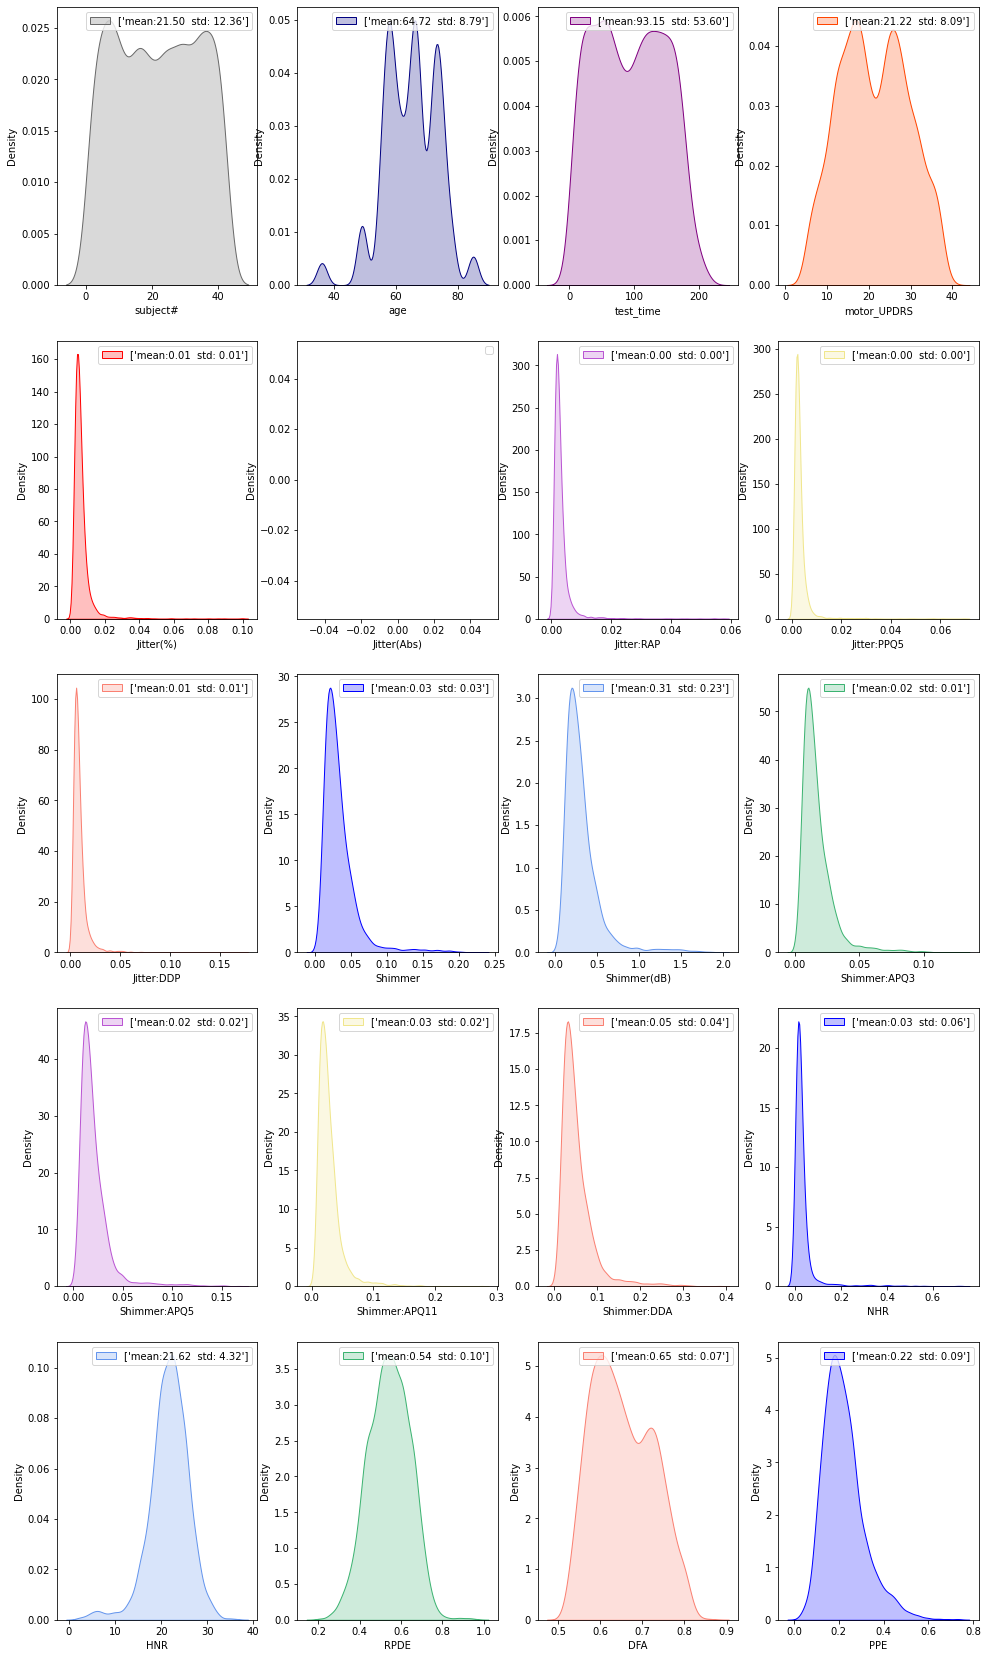

In [155]:
color = ['dimgray','navy','purple','orangered', 'red', 'green' ,'mediumorchid', 'khaki', 'salmon', 'blue','cornflowerblue','mediumseagreen','mediumorchid', 'khaki', 'salmon', 'blue','cornflowerblue','mediumseagreen','salmon', 'blue']
 
color_ind=0
n_row = 5
n_col = 4
n_sub = 1 
plt.rcParams["legend.loc"] = 'upper right'
fig = plt.figure(figsize=(8,14))
plt.subplots_adjust(left=-0.3, right=1.3,bottom=-0.3,top=1.3)
for i in (np.arange(0,20,1)):
    plt.subplot(n_row, n_col, n_sub)
    sns.kdeplot(x_train.loc[:,numeric_f[i]],color=color[color_ind],shade=True,
                 label=['mean:'+str('{:.2f}'.format(x_train.loc[:,numeric_f[i]].mean()))
                        +'  ''std: '+str('{:.2f}'.format(x_train.loc[:,numeric_f[i]].std()))])
    
    plt.xlabel(numeric_f[i])
    plt.legend()                    
    n_sub+=1
    color_ind+=1
plt.show()

Jitter and shimmer featurs are showing a signeficant skewniss.

In [156]:
jitter_shimmer_f=[col for col in x_train.columns if 'Jitter' in col or 'Shimmer' in col or col=='NHR']

In [157]:
jitter_shimmer_f

['Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR']

In [158]:
for f in jitter_shimmer_f:
    x_train[f],fitted_lambda=stats.boxcox(x_train[f])

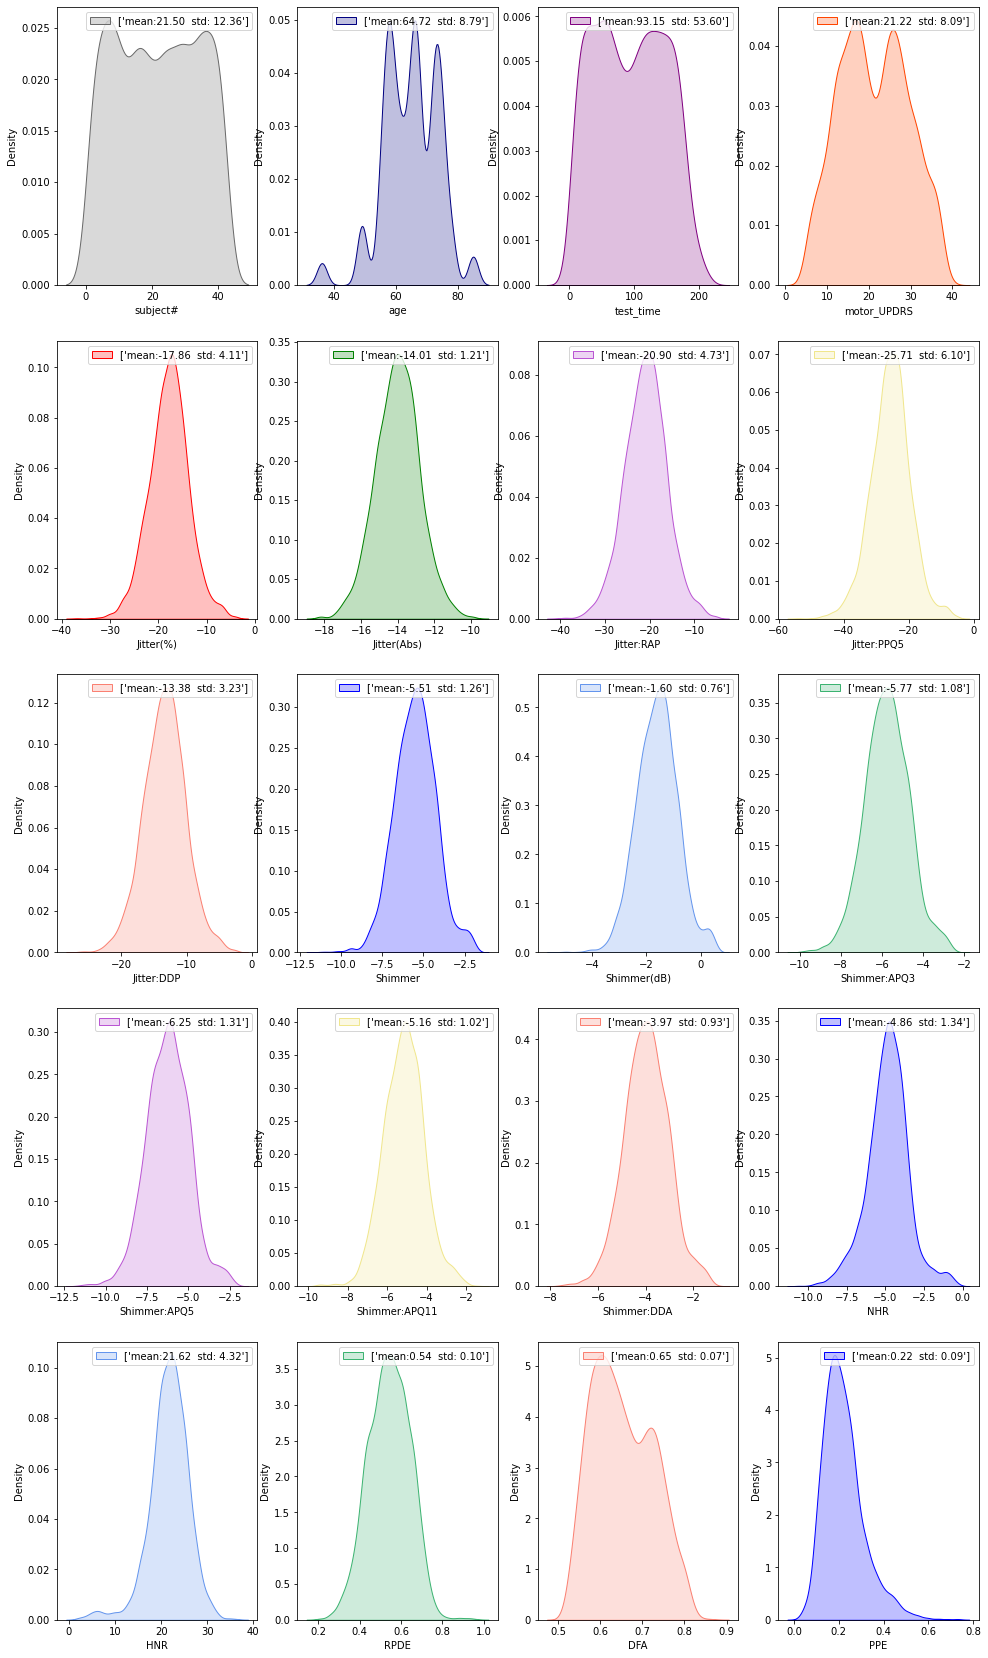

In [159]:
color = ['dimgray','navy','purple','orangered', 'red', 'green' ,'mediumorchid', 'khaki', 'salmon', 'blue','cornflowerblue','mediumseagreen','mediumorchid', 'khaki', 'salmon', 'blue','cornflowerblue','mediumseagreen','salmon', 'blue']
 
color_ind=0
n_row = 5
n_col = 4
n_sub = 1 
plt.rcParams["legend.loc"] = 'upper right'
fig = plt.figure(figsize=(8,14))
plt.subplots_adjust(left=-0.3, right=1.3,bottom=-0.3,top=1.3)
for i in (np.arange(0,20,1)):
    plt.subplot(n_row, n_col, n_sub)
    sns.kdeplot(x_train.loc[:,numeric_f[i]],color=color[color_ind],shade=True,
                 label=['mean:'+str('{:.2f}'.format(x_train.loc[:,numeric_f[i]].mean()))
                        +'  ''std: '+str('{:.2f}'.format(x_train.loc[:,numeric_f[i]].std()))])
    
    plt.xlabel(numeric_f[i])
    plt.legend()                    
    n_sub+=1
    color_ind+=1
plt.show()

As we can see above, jitter and shimmer are normalized. 

### 1.5. Categorical feature engineering

5. Assess the categorical features.
- Are categorical levels equally spread out across the features or is “lumping” occurring?
- Which values do you think should be one-hot or dummy encoded versus label encoded? Why?


The dataset has only one categorical feature which is *sex* and it preprocessed using *Lable encoding* method where gender '0' - male, '1' - female.

<AxesSubplot:>

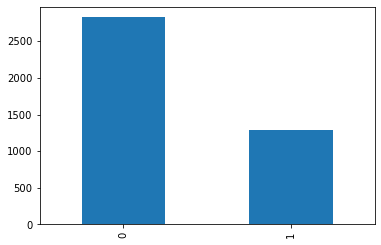

In [160]:
x_train['sex'].value_counts().plot(kind='bar')

### 1.6. KNN Model

6. Execute a basic feature engineering process.
- First, apply a KNN model to your data without pre-applying feature engineering processes.
- Create and a apply a blueprint of feature engineering processes that you think will help your model improve.
- Now reapply the KNN model to your data that has been feature engineered.
- Did your model performance improve?

#### KNN without Preprocessing

In [184]:
knn_fit = Pipeline(steps=[('knn', KNeighborsRegressor(metric='euclidean'))])

In [199]:
# Specify resampling strategy
cv = RepeatedKFold(n_splits=10, n_repeats=5)

# Create grid of hyperparameter values
hyper_grid = {'knn__n_neighbors': range(3, 26)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn_fit, hyper_grid, cv=cv, scoring='neg_mean_squared_error')
results = grid_search.fit(x_train_o, y_train_o)

In [200]:
# Best model's cross validated RMSE
math.sqrt(abs(results.best_score_))

2.0964414540800376

In [201]:
# Best model's k value
results.best_estimator_.get_params().get('knn__n_neighbors')

3

In [202]:
#All RMSE results
np.sqrt(np.abs(results.cv_results_['mean_test_score']))

array([2.09644145, 2.23323348, 2.31866644, 2.41528999, 2.50379731,
       2.58693382, 2.66763104, 2.761725  , 2.85833314, 2.95344129,
       3.04323185, 3.13051983, 3.22752497, 3.31999247, 3.40354894,
       3.48522586, 3.5641874 , 3.6375377 , 3.71457038, 3.78365781,
       3.84461568, 3.90486055, 3.96059332])

In [203]:
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(3, 26), 'RMSE': np.sqrt(np.abs(results.cv_results_['mean_test_score']))})

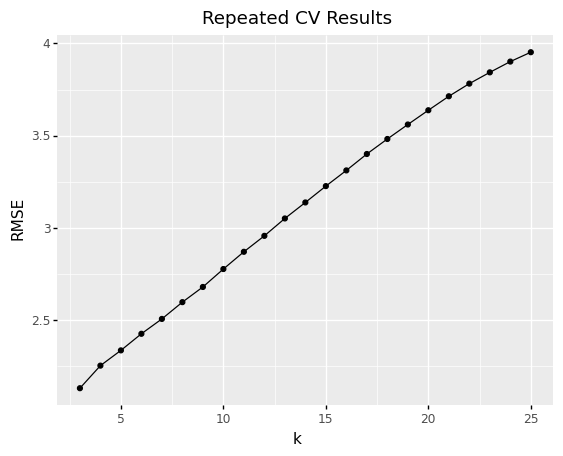

<ggplot: (8779467088948)>

In [198]:

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Repeated CV Results"))

In [ ]:
#### KNN with Preprocessing

In [220]:
numerical_ix = x_train_o.select_dtypes(include=['int64', 'float64']).columns


In [234]:
numerical_ix

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'Jitter(%)',
       'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
       'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [221]:

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_ix)])

knn_fit_p = Pipeline(steps=[('preprocessor', preprocessor),
                          ('knn', KNeighborsRegressor(metric='euclidean'))])

In [222]:
# Specify resampling strategy
cv = RepeatedKFold(n_splits=10, n_repeats=5)

# Create grid of hyperparameter values
hyper_grid = {'knn__n_neighbors': range(3, 26)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn_fit_p, hyper_grid, cv=cv, scoring='neg_mean_squared_error')
results = grid_search.fit(x_train, y_train)

In [277]:
results.

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'Jitter(%)',
       'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
       'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object'))])),
                                       ('knn',
                                        KNeighborsRegressor(metric='euclidean'))]),
             param_grid={'knn__n_neighbors': range(3, 26)},
             scoring='neg_mean_squared_error')

In [282]:
# Best model's cross validated RMSE
math.sqrt(abs(results.best_score_))

1.4715647336078346

In [224]:
# Best model's k value
results.best_estimator_.get_params().get('knn__n_neighbors')

3

In [225]:
# All RMSE results
np.sqrt(np.abs(results.cv_results_['mean_test_score']))

array([1.47156473, 1.51865454, 1.55243483, 1.60597597, 1.647737  ,
       1.69567176, 1.73637078, 1.77989687, 1.82186322, 1.86384952,
       1.91035406, 1.95510836, 1.99647272, 2.03031026, 2.06483297,
       2.09773761, 2.12917237, 2.16167244, 2.19617044, 2.22944434,
       2.26298901, 2.29467324, 2.32721999])

In [226]:

# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(3, 26), 'RMSE': np.sqrt(np.abs(results.cv_results_['mean_test_score']))})

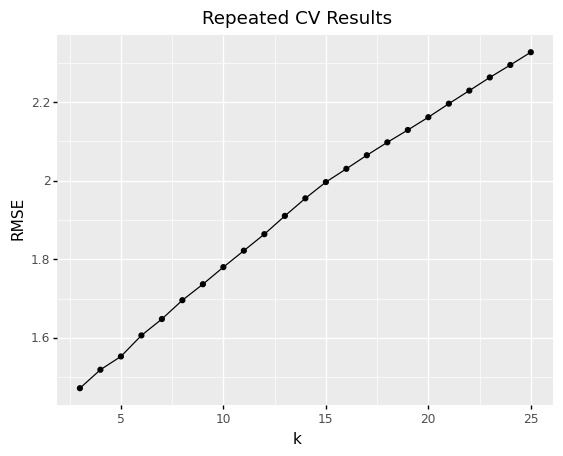

<ggplot: (8779468568857)>

In [227]:

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Repeated CV Results"))

The performance of the preprocessed KNN model results a better RMSE than the non processed one

---

## 2. Regresion (Portfolio Builder Exercise #2)

Using the same dataset leveraged for Portfolio Builder Exercise #1, write up a second report that answers the following:

1. Depending on the type of response variable, apply a linear or logistic regression model.
- First, apply the model to your data without pre-applying feature engineering processes.

In [230]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(x_train_o, y_train_o)

# predict the target on train and test data 
predict_train = model_LR.predict(x_train_o)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train_o, predict_train)**(0.5))

RMSE on train data:  3.10442424148849


- Create and a apply a blueprint of feature engineering processes that you think will help your model improve.


In [255]:
LR_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regression', LinearRegression())])

- Now reapply the model to your data that has been feature engineered.

In [296]:

# specify model
#LR_pipe.fit(x_train_o, y_train_o)         

# set up CV
model_cv = cross_val_score(LR_pipe, 
                        x_train_o, 
                        y_train_o,
                        scoring= 'neg_mean_squared_error', 
                        cv = cv) 


In [297]:
# cv results
rmse_results=[]
for i in range(0,len(model_cv),1):
    rmse_results.append(math.sqrt(abs(model_cv[i])))
min(rmse_results)

2.708739224587879

- Did your model performance improve?
Performance of preprocessed liner regression shows beter result since the RMSE is 2.81121 while the non processed model shows RMSE as 3.1044.

2. Apply a principal component regression model.

In [317]:
pca_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('pca', PCA(n_components=19)),
                          ('regression', LinearRegression())])

- Perform a grid search over several components.


In [332]:
# set up CV
pca_model_cv = cross_val_score(pca_pipe, 
                        x_train_o, 
                        y_train_o,
                        scoring= 'neg_mean_squared_error', 
                        cv = cv)

In [333]:
# cv results
rmse_results_pca=[]
for i in range(0,len(pca_model_cv),1):
    rmse_results_pca.append(math.sqrt(abs(pca_model_cv[i])))
min(rmse_results_pca)

2.814099162580647

- Identify and explain the performance of the optimal model.
After changeing the number of components to tune the model, the optimal PCA model is the one with 19 components.

3. Apply a partial least squares regression model.


In [338]:
pls_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('pls', PLSRegression(n_components=19)),
                          ('regression', LinearRegression())])

- Perform a grid search over several components.

In [339]:
pls_model_cv = cross_val_score(pls_pipe, 
                        x_train_o, 
                        y_train_o,
                        scoring= 'neg_mean_squared_error', 
                        cv = cv)

In [340]:
# cv results
rmse_results_pls=[]
for i in range(0,len(pls_model_cv),1):
    rmse_results_pls.append(math.sqrt(abs(pls_model_cv[i])))
min(rmse_results_pls)

nan

- Identify and explain the performance of the optimal model.


4. Apply a regularized regression model.

In [348]:
reg_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regr', Lasso())])

- Perform a grid search across alpha parameter values ranging between 0–1.

In [357]:
param_grid = {'regr__alpha': np.logspace(-4, 1, 6),}

In [358]:
grid = GridSearchCV(reg_pipe, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)

In [359]:
reg_results=grid.fit(x_train_o, y_train_o)

Fitting 50 folds for each of 6 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.6s finished


In [363]:
#RMSE
reg_rmse=math.sqrt(abs(reg_results.best_score_))

- What is the optimal alpha and lambda values?

In [362]:
reg_results.best_params_

{'regr__alpha': 0.0001}

- What is the MSE and RMSE for this optimal model?

In [364]:
print('MES:',abs(reg_results.best_score_))
print('RMS:',reg_rmse)

MES: 0.9136544266919912
RMS: 0.9558527222809962


- How does it compare to your previous models?

It outperforms the previouse model since it achived smaller RMSE.

5. Pick the best performing model from above.


- Identify the most influential features for this model.


In [412]:
regulizer = reg_results.best_estimator_.named_steps['regr']
n = regulizer.coef_

Feature:  subject#, Score: -16.39084
Feature:  age, Score: -13.09366
Feature:  sex, Score: -10.71171
Feature:  test_time, Score: -8.04249
Feature:  motor_UPDRS, Score: -3.57988
Feature:  Jitter(%), Score: -2.81795
Feature:  Jitter(Abs), Score: -2.07268
Feature:  Jitter:RAP, Score: -0.60915
Feature:  Jitter:PPQ5, Score: 0.05521
Feature:  Jitter:DDP, Score: 0.53019
Feature:  Shimmer, Score: 0.92072
Feature:  Shimmer(dB), Score: 1.22077
Feature:  Shimmer:APQ3, Score: 1.60815
Feature:  Shimmer:APQ5, Score: 1.89112
Feature:  Shimmer:APQ11, Score: 2.36850
Feature:  Shimmer:DDA, Score: 3.34092
Feature:  NHR, Score: 3.90128
Feature:  HNR, Score: 5.58399
Feature:  RPDE, Score: 18.99159
Feature:  DFA, Score: 21.11241
Feature:  PPE, Score: 42.35737


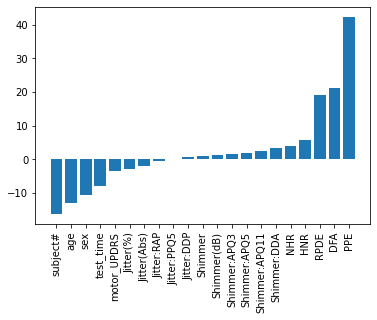

In [411]:
# get importance
regulizer = reg_results.best_estimator_.named_steps['regr']
importance_f = regulizer.coef_
features_col=x_train_o.columns
# summarize feature importance
for i,v in zip(features_col,importance_f):
	print('Feature:  %s, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_f))], importance_f)
plt.xticks([j for j in range(len(features_col))], features_col)
plt.xticks(rotation = 90) 
plt.show()

- Plot the top 10 most influential features.


Feature:  subject#, Score: -16.39084
Feature:  age, Score: -13.09366
Feature:  sex, Score: -10.71171
Feature:  test_time, Score: -8.04249
Feature:  motor_UPDRS, Score: -3.57988
Feature:  Jitter(%), Score: -2.81795
Feature:  Jitter(Abs), Score: -2.07268
Feature:  Jitter:RAP, Score: -0.60915
Feature:  Jitter:PPQ5, Score: 0.05521
Feature:  Jitter:DDP, Score: 0.53019
Feature:  Shimmer, Score: 0.92072
Feature:  Shimmer(dB), Score: 1.22077
Feature:  Shimmer:APQ3, Score: 1.60815
Feature:  Shimmer:APQ5, Score: 1.89112
Feature:  Shimmer:APQ11, Score: 2.36850
Feature:  Shimmer:DDA, Score: 3.34092
Feature:  NHR, Score: 3.90128
Feature:  HNR, Score: 5.58399
Feature:  RPDE, Score: 18.99159
Feature:  DFA, Score: 21.11241
Feature:  PPE, Score: 42.35737


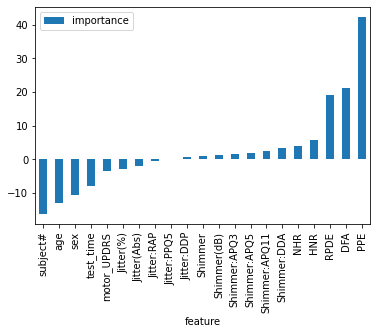

In [409]:
# get importance
regulizer = reg_results.best_estimator_.named_steps['regr']
importance = regulizer.coef_
features_col=x_train_o.columns
# summarize feature importance
for i,v in zip(features_col,importance):
	print('Feature:  %s, Score: %.5f' % (i,v))
# plot feature importance
fea_vip=pd.DataFrame(zip(features_col,importance),columns=['feature','importance'])
fea_vip.plot(kind='bar',x='feature', y='importance')
plt.xticks(rotation = 90) 
plt.show()

- Do these features have positive or negative impacts on your response variable?

In [407]:
fea_vip

,0,1
0,subject#,-16.390842
1,age,-13.093656
2,sex,-10.711714
3,test_time,-8.042489
4,motor_UPDRS,-3.579883
5,Jitter(%),-2.817952
6,Jitter(Abs),-2.072675
7,Jitter:RAP,-0.609147
8,Jitter:PPQ5,0.055206
9,Jitter:DDP,0.530188
